In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('wine_data.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 1. What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

In [4]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
quality_counts = df['quality'].value_counts()
print(f"{quality_counts.idxmax()} has occured most frequently with {quality_counts.max()} times in quality Column")
print(f"{quality_counts.idxmin()} has occured least with {quality_counts.min()} times in quality Column")

5 has occured most frequently with 681 times in quality Column
3 has occured least with 10 times in quality Column


## 2. How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

In [6]:
cor1 = df['fixed acidity'].corr(df['quality'])
print(f"Correlation between fixed acidity and quality of wine is : {cor1}")

cor2 = df['alcohol'].corr(df['quality'])
print(f"Correlation between alcohol content and quality of wine is : {cor2}")

cor3 = df['free sulfur dioxide'].corr(df['quality'])
print(f"Correlation between free sulfur dioxide and quality of wine is : {cor3}")

Correlation between fixed acidity and quality of wine is : 0.12405164911322424
Correlation between alcohol content and quality of wine is : 0.4761663239995364
Correlation between free sulfur dioxide and quality of wine is : -0.0506560572442763


In [7]:
import seaborn as sns

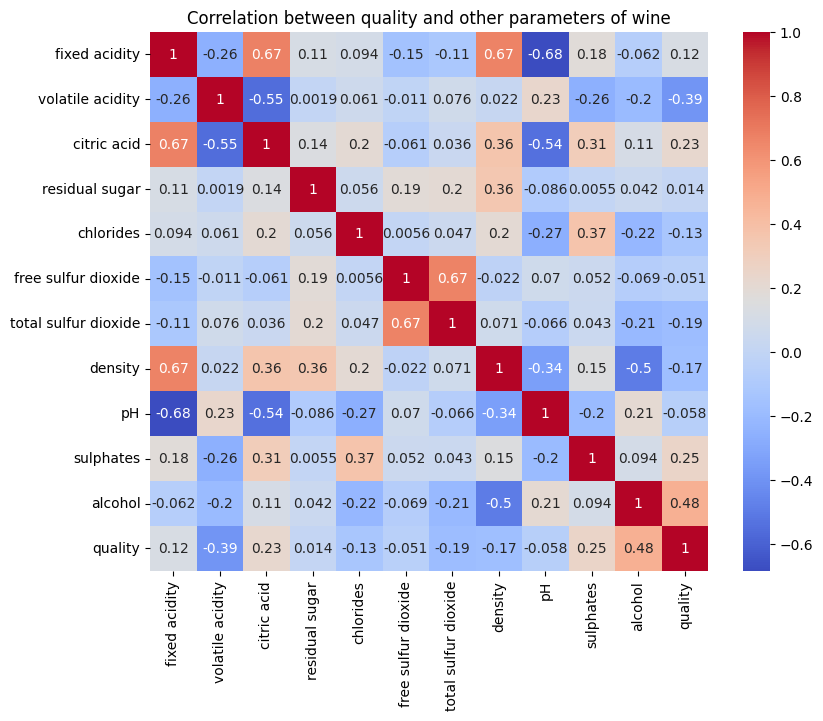

In [8]:
cols = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
correlation_matrix = cols.corr()
# print(correlation_matrix)

plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Correlation between quality and other parameters of wine')
plt.show()

## 3. What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [9]:
best_quality = quality_counts.idxmax()
worst_quality = quality_counts.idxmin()

avg_sugar_best = df[df['quality'] == best_quality]['residual sugar'].mean()
print(f"Average residual sugar for best quality wine ({best_quality}) is  {avg_sugar_best}")

avg_sugar_worst = df[df['quality'] == worst_quality]['residual sugar'].mean()
print(f"Average residual sugar for worst quality wine ({worst_quality}) is  {avg_sugar_worst}")

Average residual sugar for best quality wine (5) is  2.528854625550661
Average residual sugar for worst quality wine (3) is  2.6350000000000002


## 4. Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

In [10]:
sorted(df['quality'].unique())

[np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]

In [11]:
cor = df['volatile acidity'].corr(df['quality'])
print(f"Correlation between volatile acid and quality of wine is : {cor}")

Correlation between volatile acid and quality of wine is : -0.39055778026400695


In [12]:
# 1. Correlation (relationship strength)
correlation = df['volatile acidity'].corr(df['quality'])
print(f"1. Correlation: {correlation:.4f}")

# 2. Pattern analysis
print(f"\n2. Pattern Analysis:")
for quality in sorted(df['quality'].unique()):
    subset = df[df['quality'] == quality]
    mean_va = subset['volatile acidity'].mean()
    print(f"   Quality {quality}: Average volatile acidity = {mean_va:.4f}")


# 3. Conclusion
print(f"\n3. CONCLUSION:")
if abs(correlation) > 0.3:
    direction = "negatively" if correlation < 0 else "positively"
    print(f"   YES - Volatile acidity {direction} affects wine quality")
    print(f"   Evidence: Strong correlation ({correlation:.4f}) and clear trend in means")
elif abs(correlation) > 0.1:
    print(f"   MODERATE EFFECT - Some influence detected")
else:
    print(f"   NO CLEAR EFFECT - Weak relationship")


1. Correlation: -0.3906

2. Pattern Analysis:
   Quality 3: Average volatile acidity = 0.8845
   Quality 4: Average volatile acidity = 0.6940
   Quality 5: Average volatile acidity = 0.5770
   Quality 6: Average volatile acidity = 0.4975
   Quality 7: Average volatile acidity = 0.4039
   Quality 8: Average volatile acidity = 0.4233

3. CONCLUSION:
   YES - Volatile acidity negatively affects wine quality
   Evidence: Strong correlation (-0.3906) and clear trend in means


## 5. Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.iloc[:,0:11]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
param_grid = {
    'max_depth' : [3,4,5,6,7,8,9,10,12,15,None],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [1,2,4,8],
    'criterion' : ['gini','entropy']
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt,param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train,y_train)

print(f"Best parameters : {grid_search.best_params_}")
print(f"Best cross-validation-score : {grid_search.best_score_}")

Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation-score : 0.6052113970588235


In [16]:
best_dt = grid_search.best_estimator_

y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Optimal max_depth: {best_dt.max_depth}")


Training Accuracy: 0.6559812353401094
Test Accuracy: 0.584375
Optimal max_depth: 5



Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.73      0.68       130
           6       0.58      0.55      0.56       132
           7       0.48      0.48      0.48        42
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.28      0.29      0.29       320
weighted avg       0.56      0.58      0.57       320



C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

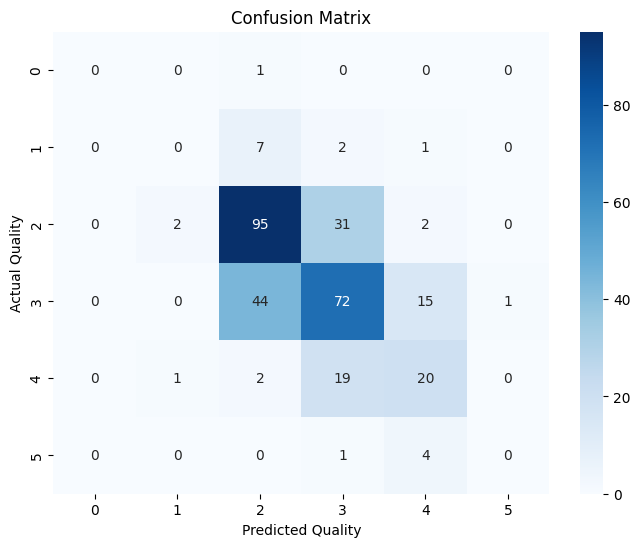

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.show()


Feature Importance:
                 feature  importance
10               alcohol    0.462441
9              sulphates    0.210169
6   total sulfur dioxide    0.106655
1       volatile acidity    0.090924
2            citric acid    0.043856
8                     pH    0.027239
3         residual sugar    0.022471
7                density    0.015350
5    free sulfur dioxide    0.011099
4              chlorides    0.009796
0          fixed acidity    0.000000


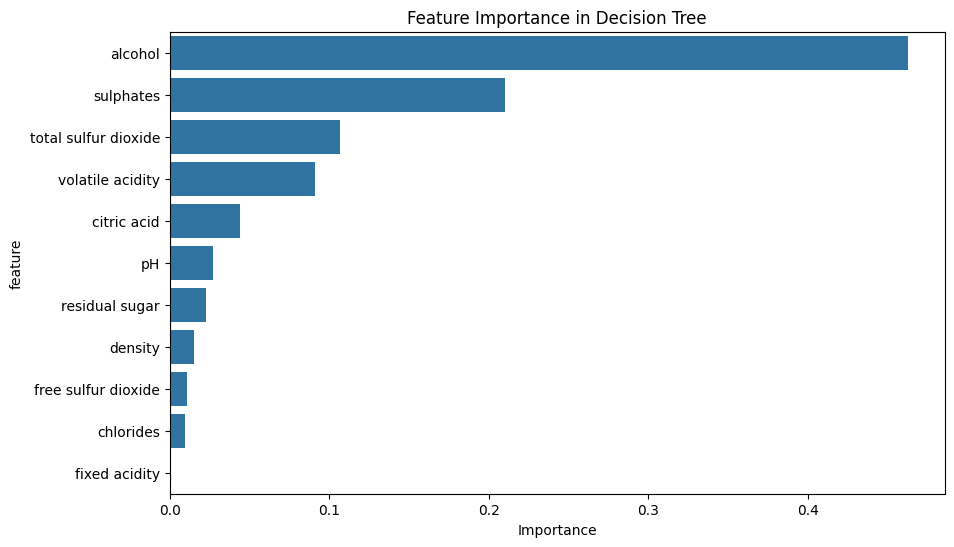

In [18]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.show()


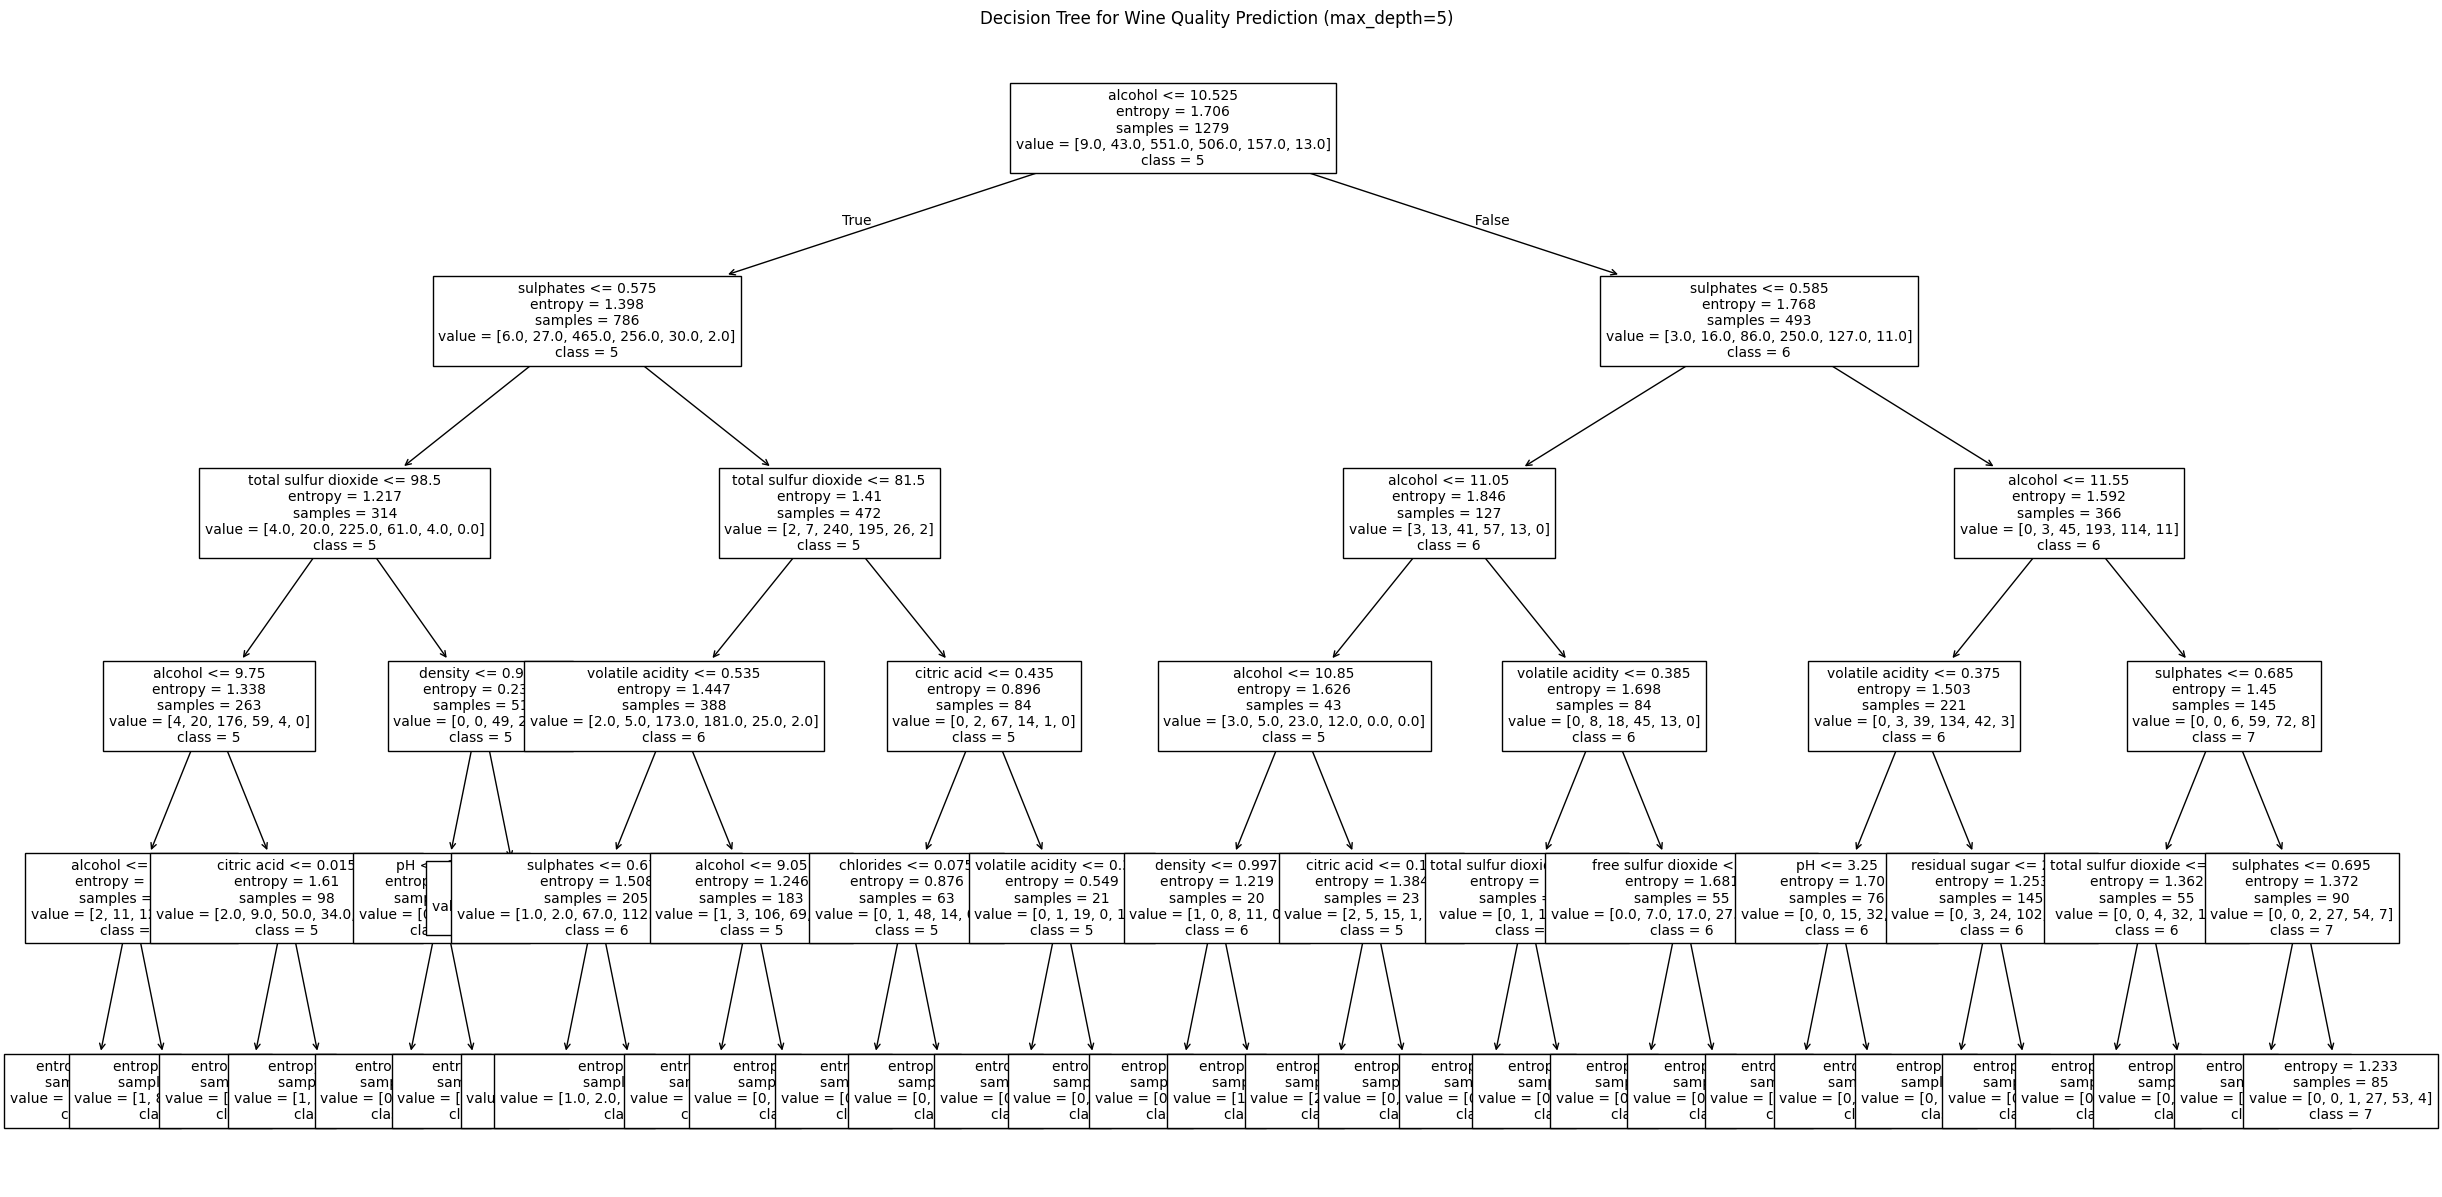

In [19]:
plt.figure(figsize=(30, 15))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=[str(i) for i in sorted(y.unique())],
    fontsize=10
)
plt.title(f'Decision Tree for Wine Quality Prediction (max_depth={best_dt.max_depth})')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_param_grid = {
    'n_estimators' : [50,100,200,300],
    'max_depth' : [3,5,7,10,None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features': ['sqrt','log2',None],
    'bootstrap' : [True,False]
}

rf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(rf,rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train,y_train)
print(f"Best RandomForest parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation-score: {rf_grid_search.best_score_}")

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best RandomForest parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation-score: 0.6919791666666667


In [22]:
best_rf = rf_grid_search.best_estimator_

rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print(f"RandomForest Training accuracy : {rf_train_accuracy}")
print(f"RandomForest test accuracy : {rf_test_accuracy}")
print(f"Number of trees: {best_rf.n_estimators}")
print(f"Max depth : {best_rf.max_depth}")

RandomForest Training accuracy : 0.9765441751368257
RandomForest test accuracy : 0.6625
Number of trees: 300
Max depth : None


In [23]:
# Assuming you have your best decision tree from previous code as 'best_dt'
dt_test_accuracy = accuracy_score(y_test, best_dt.predict(X_test))

print("=== MODEL COMPARISON ===")
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Improvement: {rf_test_accuracy - dt_test_accuracy:.4f}")

# Cross-validation comparison
dt_cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5)
rf_cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

print(f"\nCross-Validation Scores:")
print(f"Decision Tree: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})")
print(f"Random Forest: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")


=== MODEL COMPARISON ===
Decision Tree Test Accuracy: 0.5844
Random Forest Test Accuracy: 0.6625
Improvement: 0.0781

Cross-Validation Scores:
Decision Tree: 0.6036 (+/- 0.0773)
Random Forest: 0.6920 (+/- 0.0582)


Feature Importance Comparison:
                 feature  rf_importance  dt_importance
10               alcohol       0.167209       0.462441
9              sulphates       0.115566       0.210169
6   total sulfur dioxide       0.105455       0.106655
1       volatile acidity       0.100351       0.090924
7                density       0.090254       0.015350
4              chlorides       0.078688       0.009796
0          fixed acidity       0.074647       0.000000
8                     pH       0.068448       0.027239
2            citric acid       0.068255       0.043856
3         residual sugar       0.066933       0.022471
5    free sulfur dioxide       0.064193       0.011099


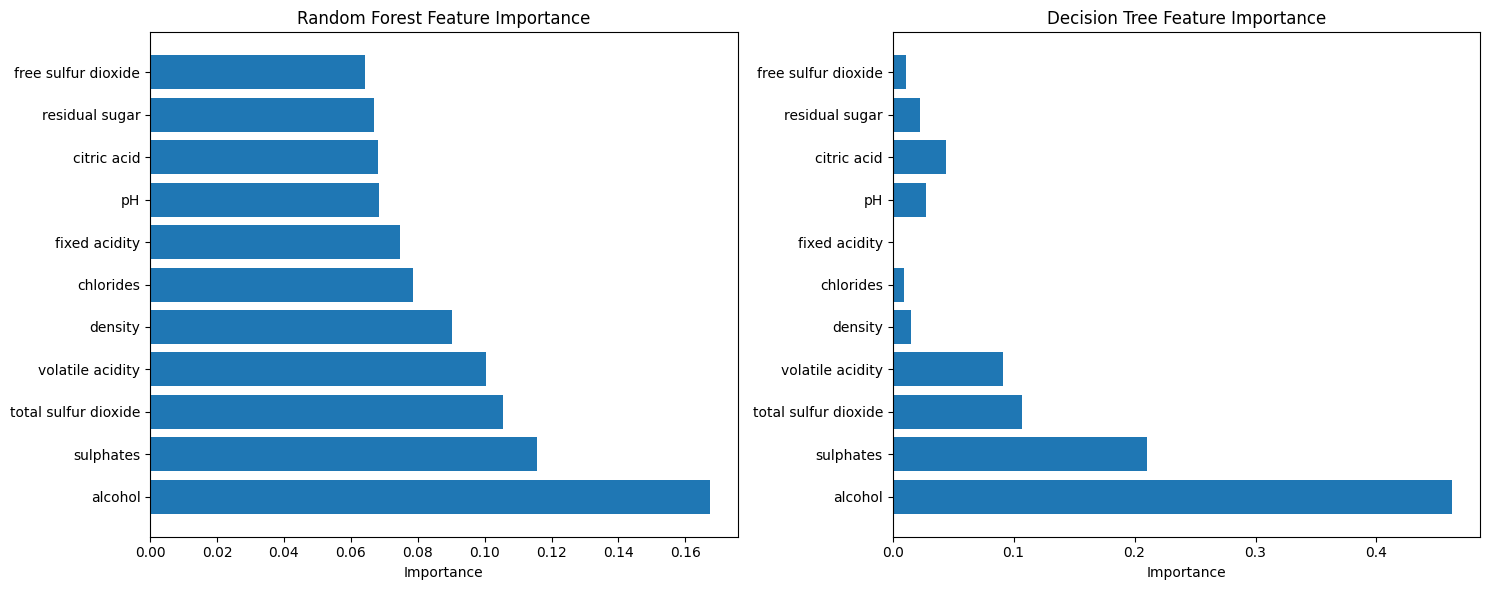

In [24]:
# Feature importance comparison
rf_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': best_rf.feature_importances_,
    'dt_importance': best_dt.feature_importances_
}).sort_values('rf_importance', ascending=False)

print("Feature Importance Comparison:")
print(rf_feature_importance)

# Plot feature importance comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest importance
ax1.barh(rf_feature_importance['feature'], rf_feature_importance['rf_importance'])
ax1.set_title('Random Forest Feature Importance')
ax1.set_xlabel('Importance')

# Decision Tree importance
ax2.barh(rf_feature_importance['feature'], rf_feature_importance['dt_importance'])
ax2.set_title('Decision Tree Feature Importance')
ax2.set_xlabel('Importance')

plt.tight_layout()
plt.show()


=== RANDOM FOREST CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.77      0.75       130
           6       0.62      0.71      0.66       132
           7       0.60      0.43      0.50        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320


=== DECISION TREE CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.73      0.68       130
           6       0.58      0.55      0.56       132
           7       0.48      0.48      0.48        42
           8       0.00      0.00      0.00

C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

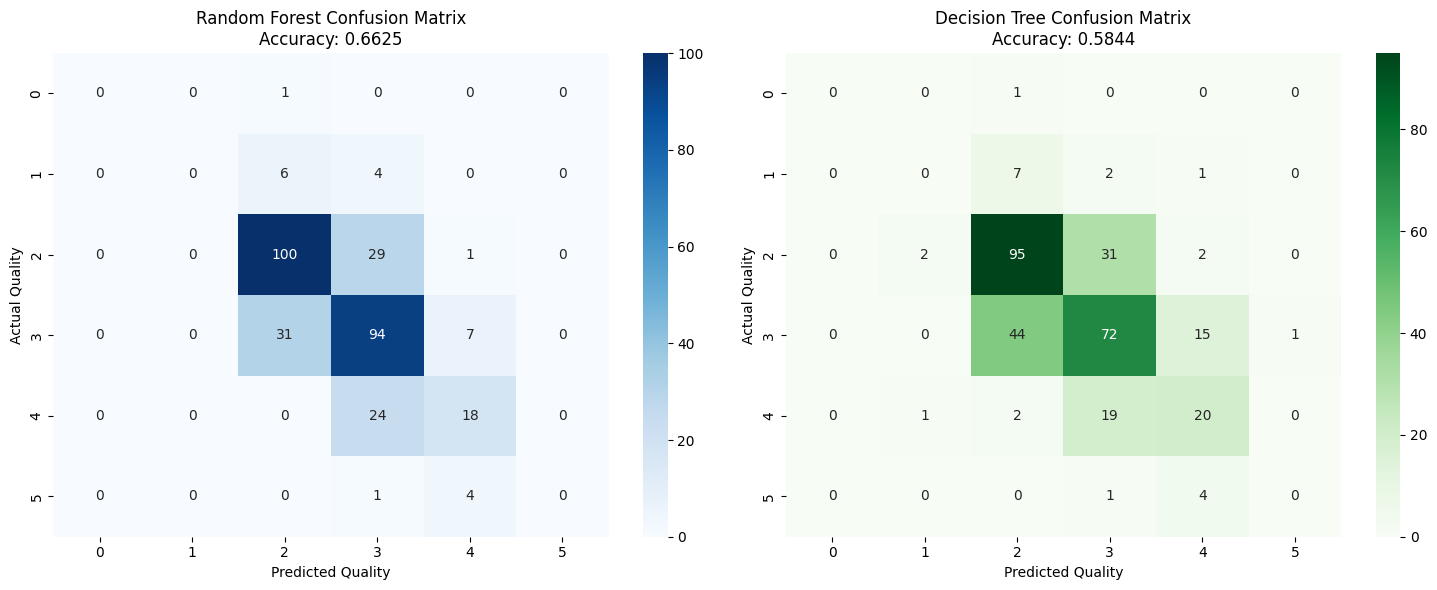

In [25]:
# Classification reports
print("=== RANDOM FOREST CLASSIFICATION REPORT ===")
print(classification_report(y_test, rf_test_pred))

print("\n=== DECISION TREE CLASSIFICATION REPORT ===")
print(classification_report(y_test, best_dt.predict(X_test)))

# Confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest confusion matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title(f'Random Forest Confusion Matrix\nAccuracy: {rf_test_accuracy:.4f}')
ax1.set_xlabel('Predicted Quality')
ax1.set_ylabel('Actual Quality')

# Decision Tree confusion matrix
dt_cm = confusion_matrix(y_test, best_dt.predict(X_test))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title(f'Decision Tree Confusion Matrix\nAccuracy: {dt_test_accuracy:.4f}')
ax2.set_xlabel('Predicted Quality')
ax2.set_ylabel('Actual Quality')

plt.tight_layout()
plt.show()


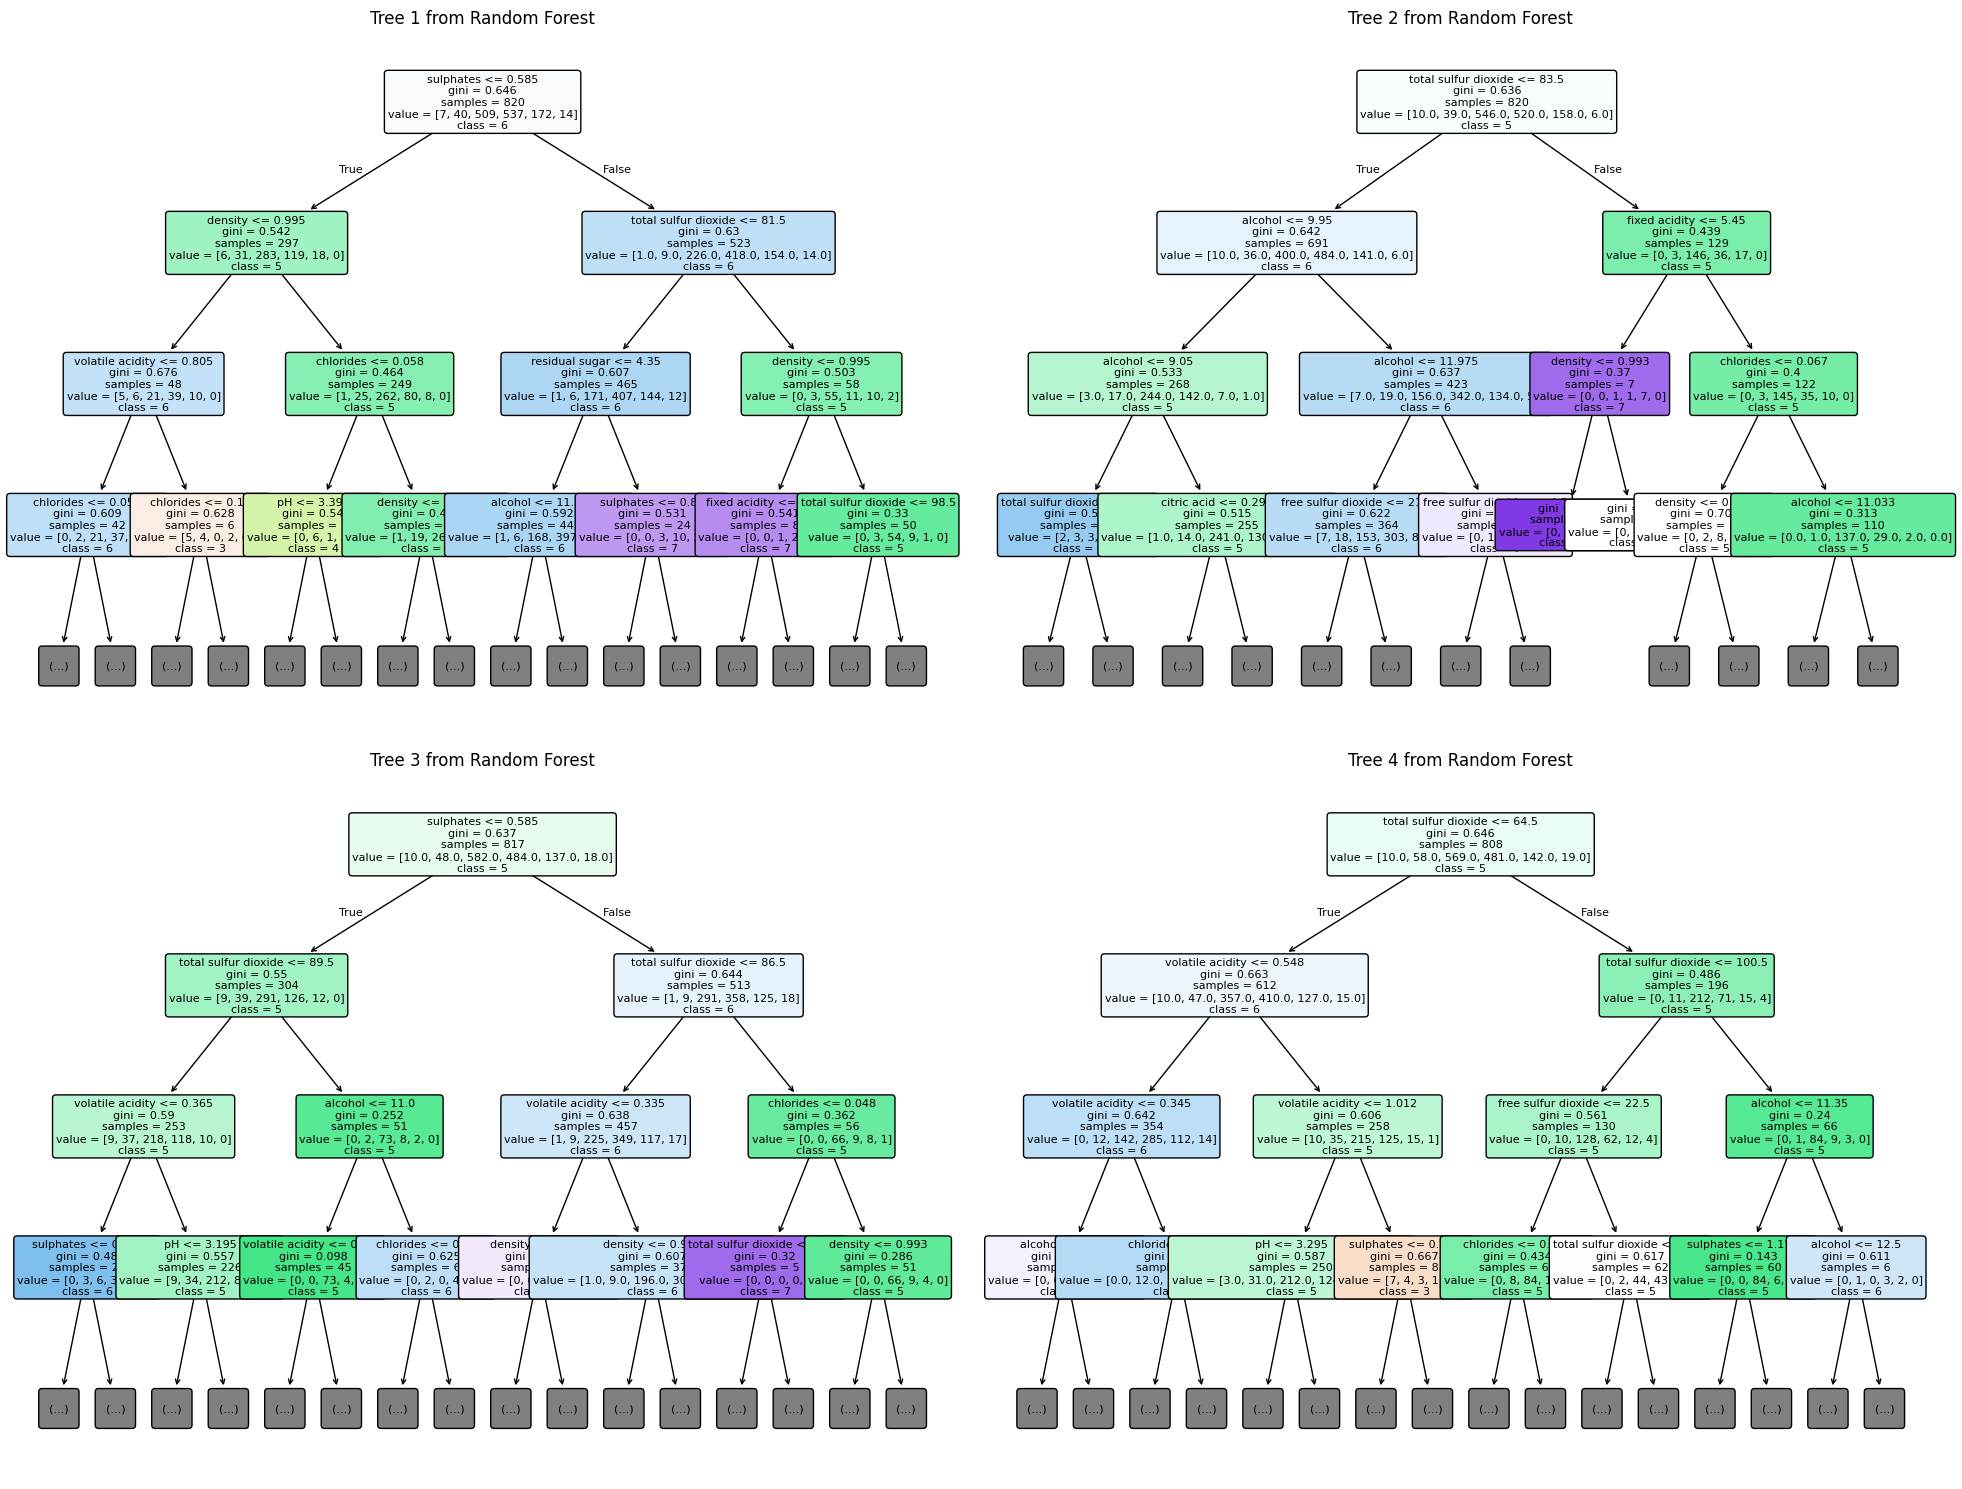

Random Forest contains 300 trees
Above are just the first 4 trees (simplified to depth 3 for visualization)


In [26]:
from sklearn.tree import plot_tree

# Plot first few trees from the Random Forest
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

for i in range(4):  # Plot first 4 trees
    plot_tree(
        best_rf.estimators_[i],
        feature_names=X.columns,
        class_names=[str(j) for j in sorted(y.unique())],
        filled=True,
        rounded=True,
        fontsize=8,
        max_depth=3,  # Limit depth for visualization
        ax=axes[i]
    )
    axes[i].set_title(f'Tree {i+1} from Random Forest')

plt.tight_layout()
plt.show()

print(f"Random Forest contains {best_rf.n_estimators} trees")
print("Above are just the first 4 trees (simplified to depth 3 for visualization)")


=== MODEL CONFIDENCE ANALYSIS ===
Random Forest average confidence: 0.6152
Decision Tree average confidence: 0.6441


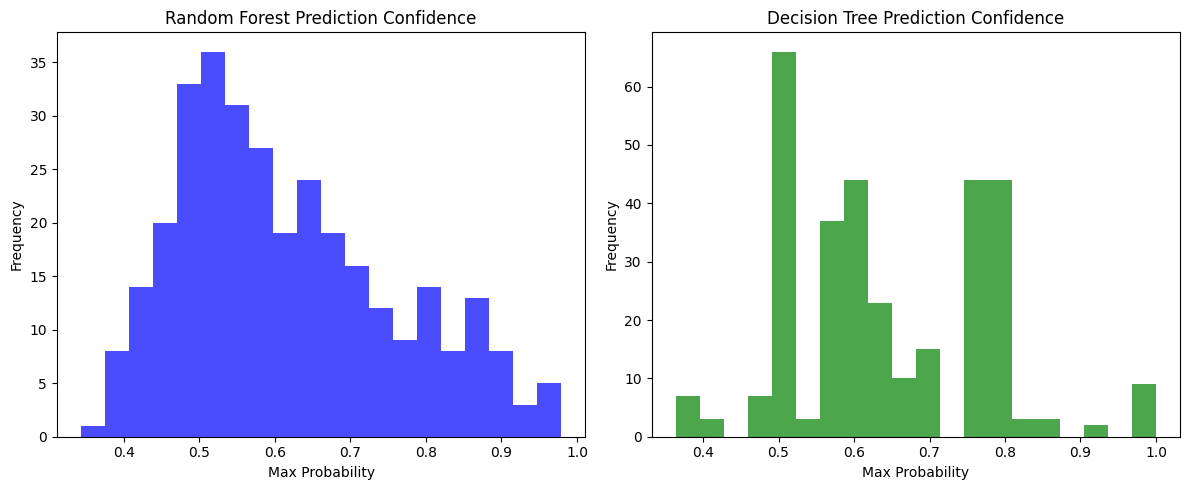

In [27]:
# Analyze prediction probabilities
rf_probabilities = best_rf.predict_proba(X_test)
dt_probabilities = best_dt.predict_proba(X_test)

# Average confidence (max probability) for each model
rf_confidence = np.mean(np.max(rf_probabilities, axis=1))
dt_confidence = np.mean(np.max(dt_probabilities, axis=1))

print("=== MODEL CONFIDENCE ANALYSIS ===")
print(f"Random Forest average confidence: {rf_confidence:.4f}")
print(f"Decision Tree average confidence: {dt_confidence:.4f}")

# Plot confidence distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(np.max(rf_probabilities, axis=1), bins=20, alpha=0.7, color='blue')
plt.title('Random Forest Prediction Confidence')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(np.max(dt_probabilities, axis=1), bins=20, alpha=0.7, color='green')
plt.title('Decision Tree Prediction Confidence')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


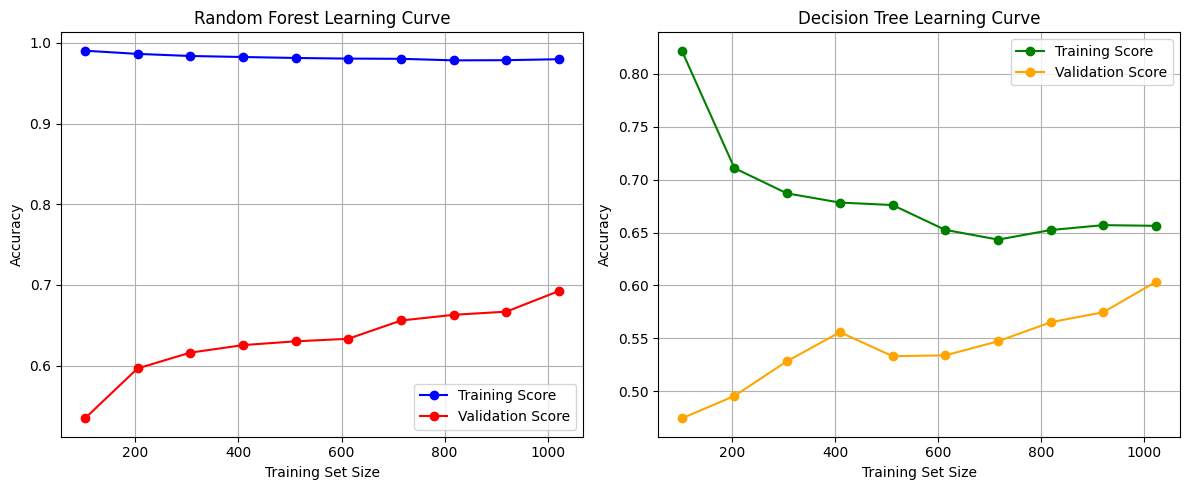

In [28]:
from sklearn.model_selection import learning_curve

# Learning curves to see how models perform with different training sizes
train_sizes, rf_train_scores, rf_val_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_sizes, dt_train_scores, dt_val_scores = learning_curve(
    best_dt, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, np.mean(rf_train_scores, axis=1), 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, np.mean(rf_val_scores, axis=1), 'o-', color='red', label='Validation Score')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_sizes, np.mean(dt_train_scores, axis=1), 'o-', color='green', label='Training Score')
plt.plot(train_sizes, np.mean(dt_val_scores, axis=1), 'o-', color='orange', label='Validation Score')
plt.title('Decision Tree Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## optuma hypertuning technique

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(trial):
    # Suggest values for the hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 400)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Create the RandomForestClassifier with suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )

    # Perform 3-fold cross-validation and calculate accuracy
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    return score  # Return the accuracy score for Optuna to maximize


In [46]:
# Create a study object and optimize the objective function

import optuna
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())  # We aim to maximize accuracy
study.optimize(objective, n_trials=50)  # Run 50 trials to find the best hyperparameters


[I 2025-06-19 14:10:17,662] A new study created in memory with name: no-name-fa3ac453-08d3-46a3-9d04-e5f2309bdefd
[I 2025-06-19 14:10:23,321] Trial 0 finished with value: 0.5895588235294118 and parameters: {'n_estimators': 175, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.5895588235294118.
[I 2025-06-19 14:10:26,076] Trial 1 finished with value: 0.6693075980392157 and parameters: {'n_estimators': 150, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.6693075980392157.
[I 2025-06-19 14:10:28,312] Trial 2 finished with value: 0.6200674019607844 and parameters: {'n_estimators': 166, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.6693075980392157.
[I 2025-06-19 14:10:39,098] Trial 3 finished with value: 0.6396139705882353 an

In [50]:

# Print the best result
optuma_accuracy = study.best_trial.value
print(f'Best trial accuracy: {optuma_accuracy}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.6935508578431373
Best hyperparameters: {'n_estimators': 349, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}


In [61]:
from sklearn.metrics import accuracy_score

# Training a RandomForestClassifier using the best hyperparameters from Optuna
best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)

best_model.fit(X_train, y_train)

y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f'Test Accuracy with best hyperparameters: {test_accuracy}')
print(f'Train Accuracy with best hyperparameters: {train_accuracy}')


Test Accuracy with best hyperparameters: 0.665625
Train Accuracy with best hyperparameters: 0.9796716184519155


In [65]:
print("="*50)
print("FINAL MODEL COMPARISON SUMMARY")
print("="*50)

print(f"Decision Tree:")
print(f"  - Test Accuracy: {dt_test_accuracy:.4f}")
print(f"  - Max Depth: {best_dt.max_depth}")
print(f"  - Interpretability: High (single tree)")
print(f"  - Training Time: Fast")

print(f"\nRandom Forest using grid search cv:")
print(f"  - Test Accuracy: {rf_test_accuracy:.4f}")
print(f"  - Number of Trees: {best_rf.n_estimators}")
print(f"  - Max Depth: {best_rf.max_depth}")
print(f"  - Interpretability: Lower (ensemble)")
print(f"  - Training Time: Slower")

print(f"\nRandom Forest using optuna hypertuning technique:")
print(f"  - Test Accuracy: {test_accuracy:.4f}")
print(f"  - Number of Trees: {study.best_trial.params['n_estimators']}")
print(f"  - Max Depth: {study.best_trial.params['max_depth']}")
print(f"  - Interpretability: Lower (ensemble)")
print(f"  - Training Time: Slower")

print(f"\nRecommendation:")
if rf_test_accuracy > dt_test_accuracy + 0.01:
    if(rf_test_accuracy > test_accuracy + 0.01):
        print("Use Random Forest with grid search - Significantly better accuracy")
    else:
        print("Use Random Forest with optima hypertuning technique - Slightly better accuracy")
elif abs(rf_test_accuracy - dt_test_accuracy) < 0.01:
    print("Both models perform similarly - Choose based on interpretability needs")
else:
    print("Decision Tree is sufficient - Simpler and more interpretable")


FINAL MODEL COMPARISON SUMMARY
Decision Tree:
  - Test Accuracy: 0.5844
  - Max Depth: 5
  - Interpretability: High (single tree)
  - Training Time: Fast

Random Forest using grid search cv:
  - Test Accuracy: 0.6625
  - Number of Trees: 300
  - Max Depth: None
  - Interpretability: Lower (ensemble)
  - Training Time: Slower

Random Forest using optuna hypertuning technique:
  - Test Accuracy: 0.6656
  - Number of Trees: 349
  - Max Depth: 16
  - Interpretability: Lower (ensemble)
  - Training Time: Slower

Recommendation:
Use Random Forest with optima hypertuning technique - Slightly better accuracy


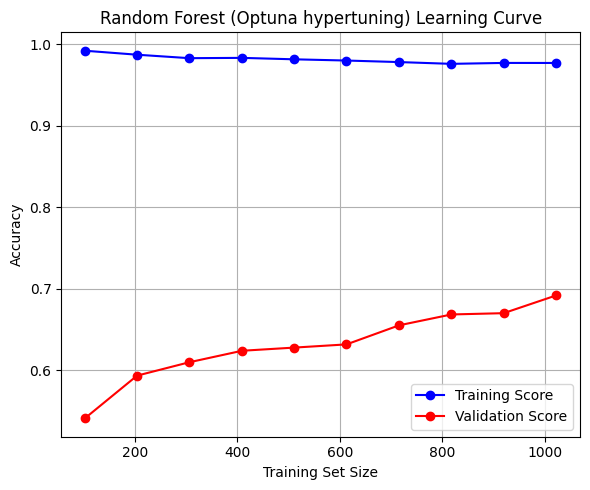

In [68]:
from sklearn.model_selection import learning_curve

# Learning curves to see how models perform with different training sizes
train_sizes, rf_train_scores, rf_val_scores = learning_curve(
    best_model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)


# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, np.mean(rf_train_scores, axis=1), 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, np.mean(rf_val_scores, axis=1), 'o-', color='red', label='Validation Score')
plt.title('Random Forest (Optuna hypertuning) Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()



Classification Report using Optuma hypertuning technique:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.77      0.74       130
           6       0.63      0.71      0.67       132
           7       0.61      0.45      0.52        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.67      0.65       320



C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Dushyant\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



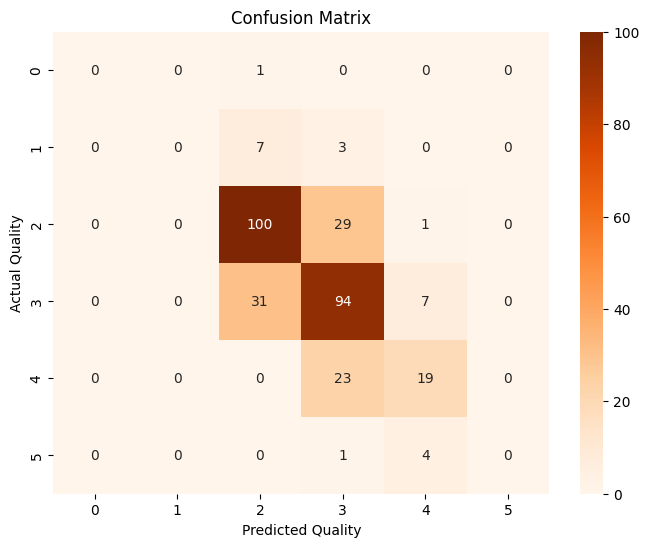

In [69]:
print("\nClassification Report using Optuma hypertuning technique:\n")
print(classification_report(y_test, y_pred_test))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.show()


In [55]:
# For visualizations
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [56]:
# 1. Optimization History
plot_optimization_history(study).show()

In [57]:
# 2. Parallel Coordinates Plot
plot_parallel_coordinate(study).show()

In [58]:
# 3. Slice Plot
plot_slice(study).show()

In [71]:
# 4. Contour Plot
# plt.figure(figsize=(12,6))
plot_contour(study).show()

In [60]:
# 5. Hyperparameter Importance
plot_param_importances(study).show()